# KNN - K-Nearest Neighbors (K-vizinhos mais próximos)

### Objetivos dessa aula:
* apresentar o conceito do algoritmo de KNN
* explicar a diferença do KNN aplicado em problemas de regressão e classificação
* apresentar um caso prático de KNN
* prós e contras dessa abordagem

fazer agenda e objetivo

• Algoritmo K-Nearest Neighbor

• Como o algoritmo KNN funciona

• Diferentes formas de aprendizado

• Performance e dimensionalidade

• Como escolher o valor de K?

• Etapas de pré-processamento necessárias

• Caso de estudo para aplicação do modelo K-NN

• Descision Boundaries

• Pros e Contra do algoritmo


# Intuição

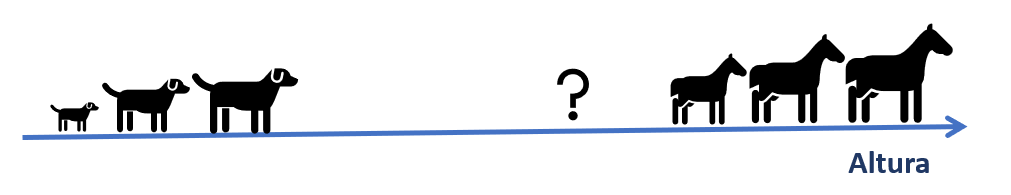

<br>

### Funcionamento
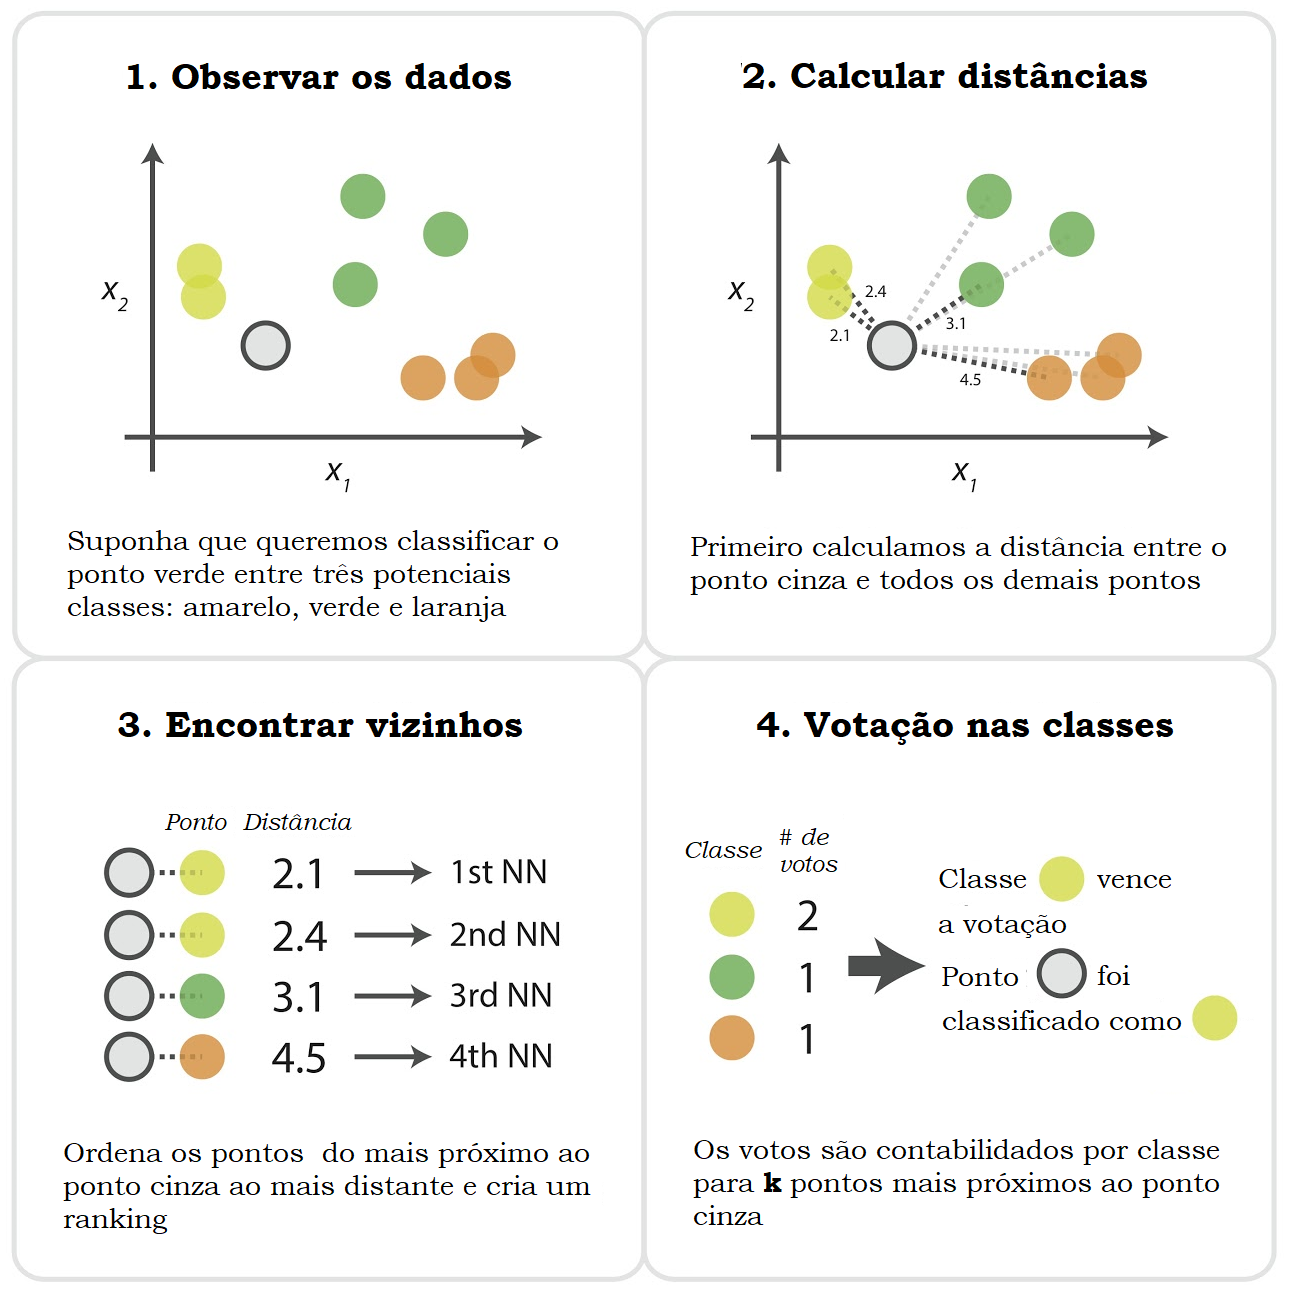

Fonte: https://cambridgecoding.wordpress.com/

### Pergunta: Como ficaria em um problema de regressão?
 <br>
 <br>
 <br>
 <br>
 <br>

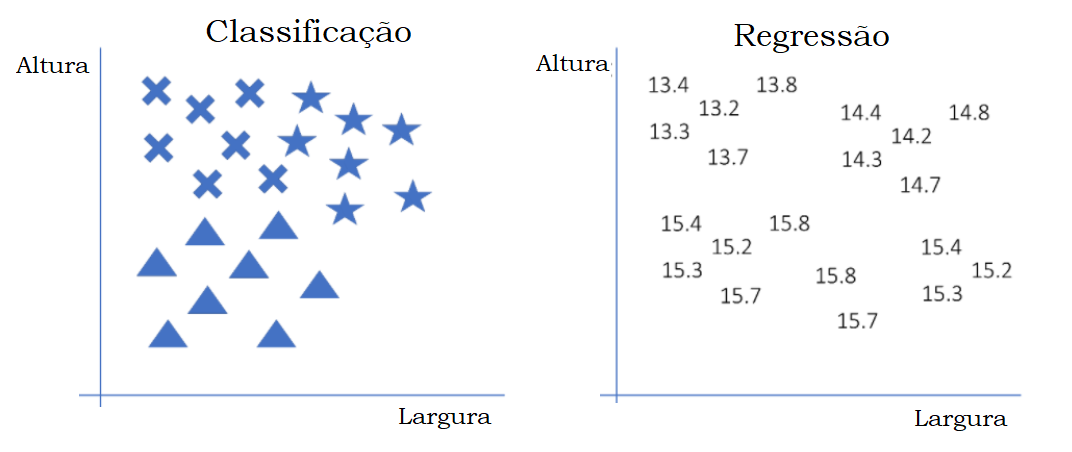
Fonte: https://realpython.com/knn-python/

#### Resposta:
Em um problema de classificação selecionamos a classe mais frequente (moda) entre os k vizinhos mais próximos enquanto na regressão calculamos a média dos k valores target mais próximos. <br>


Os passos realizados pelo algoritmo são: <br>
1 - Calcular a distância entre o ponto de interesse e os demais pontos <br>
2 - Rankear os pontos pela menor distância <br>
3 - Encontrar os k pontos/vizinhos mais próximos <br>
4 - Votar o label para o ponto a ser previsto ou realizar uma média entre os pontos <br>

Se em um problema de classificação tivermos n classes evitar usar k múltiplo de n para não termos empate de classes. Exemplo: em um problema como o mostrado acima com 3 classes, se usarmos k=3 podemos ter uma situação em que os três pontos mais próximos perteçam à classes diferentes

## Caso prático
Vamos aplicar o KNN em um caso prático e discutir outros pontos essenciais sobre o modelo.
<br>

#### Problema:
Queremos predizer se um usuário que clicou no nosso anúncio em uma rede social irá realizar uma compra. Nesse caso, temos um problema de classificação binário.
<br> <br>
Fonte dos dados:https://www.kaggle.com/rakeshrau/social-network-ads

In [149]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar o dataset
dataset = pd.read_csv('Social_Network_Ads.csv').drop('Gender', axis=1)
dataset.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


##### Metadados
*User ID:* identificador único do usuário (variável inteira positiva) <br>
*Gender:* gênero do usuário (variável binária string) <br>
*Age:* idade do usuário (variável inteira positiva) <br>
*Estimated Salary:* salário estimado da pessoa (variável inteira positiva) <br>
*Purchased:* indica se o usuário realizou ou não uma compra (booleana numérica)

### Data Analisys

In [150]:
# Informações básicas do dataset
print(dataset.shape)
dataset.describe()

(400, 4)


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Figure size 432x288 with 0 Axes>

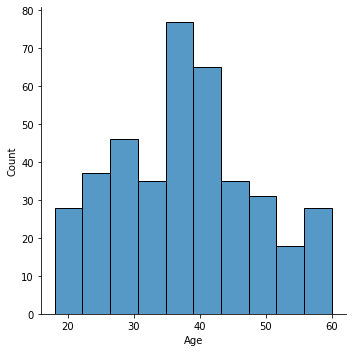

In [151]:
plt.figure()
sns.displot(dataset.Age)

<Figure size 432x288 with 0 Axes>

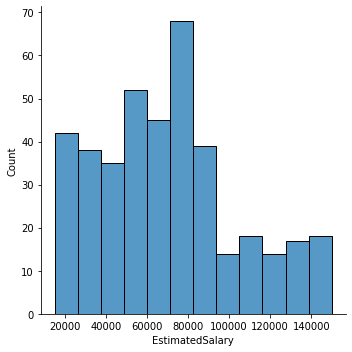

In [152]:
plt.figure()
sns.displot(dataset['EstimatedSalary'])

In [153]:
# Quantidade de amostra em cada classe
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [154]:
dataset.Purchased.value_counts()/dataset.shape[0]

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

O dataset está desbalanceado

In [99]:
# Checar se temos User ID duplicados
print("Tamanho do dataset original:", dataset['User ID'].shape)
print("Tamanho do dataset sem duplicados:", dataset['User ID'].drop_duplicates().shape)

Tamanho do dataset original: (400,)
Tamanho do dataset sem duplicados: (400,)


Como esses dois valores são iguais não temos duplicados na nossa base

<br>

### Processamento dos Dados

#### Pré-processamento: Parte 1
No nosso dataset temos que converter a coluna Gender de string para booleana

In [133]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [135]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [137]:
dataset = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)
dataset.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [146]:
# Definir variável target
target = 'Purchased'

# Separa variáveis independentes do target
X = dataset.drop([target, 'User ID'], axis=1)       # Variáveis independentes
y = dataset[[target]]                               # Variável dependente / target  

X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [147]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


#### Separação dos dados em um dataset de treino e um de teste

In [148]:
# Separa um dataset para treino e outro para teste (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)

Tamanho do treino:  (320, 3)
Tamanho do teste:  (80, 3)


In [141]:
X_train.head()

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000


#### Pré-processamento: Parte 2
Como nossos dados tem escalas muito diferentes (Estimated Salary é da ordem de 1000x maior que o Age) e o KNN depende da distância, nós temos que normalizar nossos dados. <br> <br>
LEMBRETE:  a normalização NUNCA deve acontecer ANTES da separação em treino e teste. Essa é uma das formas mais comuns de leakage

In [142]:
# Normalização dos dados com Min Max
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:5]

array([[0.95238095, 0.95555556],
       [0.97619048, 0.5037037 ],
       [0.14285714, 0.2962963 ],
       [0.19047619, 0.14814815],
       [0.95238095, 0.17037037]])

### Treino do modelo e previsão

In [143]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier

# Instância o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=3 # quantidade de vizinhos 
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2) # use p=2 para distância euclidiana
clf.fit(X_train, y_train)

# Predizendo no dataset de teste
y_pred = clf.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

### Avaliação do modelo

Acurácia do modelo: 95.0%


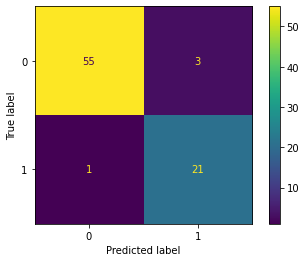

In [144]:
# Cria matriz de confusão
from sklearn.metrics import accuracy_score, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {ac:.1%}")

plot_confusion_matrix(clf, X_test, y_test);

## Voilá! Está pronto nosso primeiro KNN. Ele servirá como baseline de comparação para as melhorias.

## Melhorias:
* Definir o melhor valor para K
* Definir qual melhor métrica de distância:
        * Distância Euclidiana
        * Distância de Hamming
        * Distância Manhattan
* Considerar pesos maiores para pontos mais próximos
* Considerar pesos maiores para features mais importantes
* Balancear classes
* Escolher uma métrica melhor para avaliar datasets desbalanceados

### Avaliando fronteira de decisão (decision boundaries)

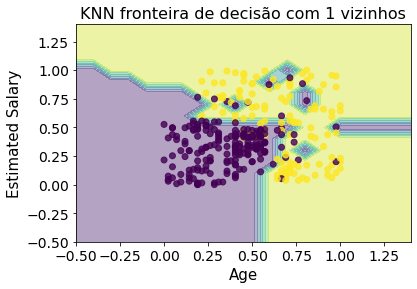

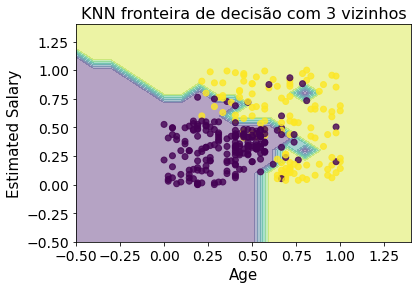

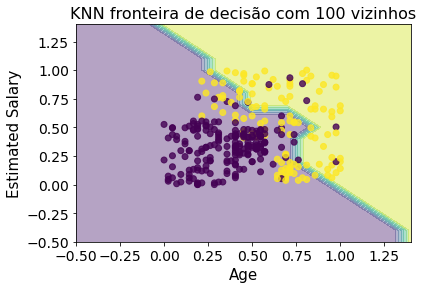

In [106]:
for k in [1,3,100]:
    plt.figure()
    plt.title(f"KNN fronteira de decisão com {k} vizinhos", fontsize=16)
    plot_decision_boundaries(X_train, y_train,
                                KNeighborsClassifier,
                                n_neighbors=k)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show(); #[:,[0,2]]


## Underfit e Overfit no K-NN

*Overfitting:* <br>
k = 1 ele memoriza os dados e não generaliza bem <br>
*Underfitting:* <br>
k = # de dados ele prediz com a classe majoritária (simples)

## Principais pontos do KNN:
* É um algoritmo supervisionado, ou seja, precisa de uma variável de target <br>
* Aplicável tanto para problemas de classificação (target são classes) quanto de regressão (target contínuo) <br>
* É um dos modelos mais simples e fáceis de ser implementado e compreendido <br>
* É um algoritmo preguiçoso (lazy). Estes tipos de algoritmos trabalham menos na fase de treinamento e muito mais na fase de teste, pois simplesmente armazenam as instâncias de dados do treinamento para na fase de teste realizar o trabalho pesado. <br>
* É um Algoritmo de Aprendizagem Não Linear, ou seja, não utiliza linhas e hiperplanos para separar os dados
* Pode ser aplicado em casos que temos pouca quantidade de dados

#### Prós 

1 – É um dos mais simples algoritmos a se implementar.  <br>
2 – Modelos mais complexos, como uma rede neural, necessitam de uma quantidade maior de dados para serem treinados que o KNN. <br>
3 – Poucos paramêtros para tunning (Valor de K, Medida de Distância e peso nas distâncias) <br>
4 – O tempo de treinamento é utilizado para "memorizar" os dados. Ele armazena os dados na RAM. Por isso ele possui um dos fit mais rápidos. <br>
5 – O KNN pode ser utilizado em dados não lineares bem como para problemas de regressão. <br>
6 – Facilmente interpretável <br>


#### Contras

1 – Demora excessiva na fase de teste e alto consumo de memória para realizar esta atividade, uma vez que o mesmo armazena todo dataset em memória. (KDtrees e BallTrees)<br>
2 – KNN não é indicado a dados de grandes dimensões, imagina ter que calcular a distância de todos os pontos de dados entre si. Quanto mais dados e mais dimensões desses registros, maior será o tempo para processar os cálculos. <br>
3 – Como ele depende de medidas de distância é importante se atentar a escala dos valores utilizados. <br>
4 – Classes muito desbalanceadas faz com que a classe marjoritária domine na votação
5 – Dimensões irrelevantes podem causar ruídos nos dados


4.Failure Cases of KNN?
1. When given data points very far away from the data points it can not find any surrounding data points so we can not say the given data point belongs to positive or negative.
2. When our data set spread randomly or in other words mixed up all the classes we can not find which class it belongs to so, it fails. <br>
<br>
KNN is a non-parametric algorithm and does not require any assumptions on the data distribution. This gives KNN an extra edge in specific settings where the data is highly unusual. This is the reason for KNN being the first choice when there is no prior knowledge or very little knowledge about the data distribution. <br> <br>
5)    The accuracy of KNN deteriorates with high-dimension data as there is hardly any difference between the nearest and farthest neighbor. High dimensionality of datasets is a major problem when working with classification algorithms like KNN. KNN suffers from the curse of dimensionality because it is usually implemented using an approximate nearest neighbor search algorithm such as KD-tree

Few Applications of KNN Algorithm1)    The biggest application of KNN is recommender systems- recommending ads to display to a user (YouTube) or recommending products (Amazon ), or recommending media to consume.  For example, if you buy a smartphone from Amazon, it recommends a mobile cover or earphones to go with it.

2)    KNN is used in the retail industry to identify patterns in credit card usage. Most of the new transaction scrutinizing software applications today use KNN to analyze the register data and detect any unusual or suspicious activities. For instance, if the register data of a retail store shows that a lot of information is being entered manually instead of automatically scanning or swiping the card. This is an indication of the fact that the employee is stealing customers information.

3)     KNN also finds application in politics for classifying a potential voter as a “will vote” or “will not vote” candidate.

4)    Other advanced applications of KNN include video recognition, image recognition, and handwriting detection.

## Próxima aula:
* Medidas de distância
* Como escolher o melhor valor de K e a melhor métrica de distância - conjunto de validação
* Como avaliar overfitting e underfitting 
* O que fazer quando temos um dataset muito grande
* Maldição da dimensionalidade

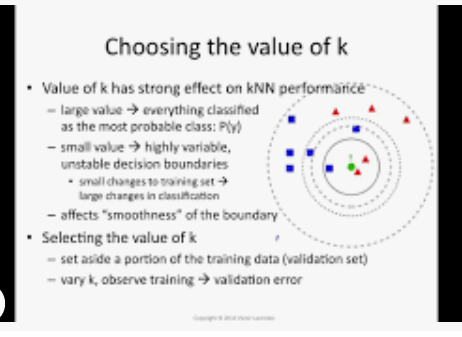

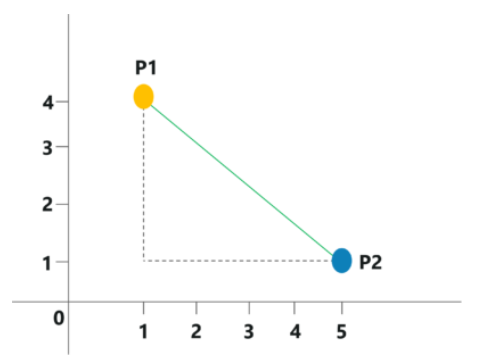
Distância euclidiana


Consider the above image, here we’re going to measure the distance between P1 and P2 by using the Euclidian Distance measure.
The coordinates for P1 and P2 are (1,4) and (5,1) respectively.
The Euclidian Distance can be calculated like so:
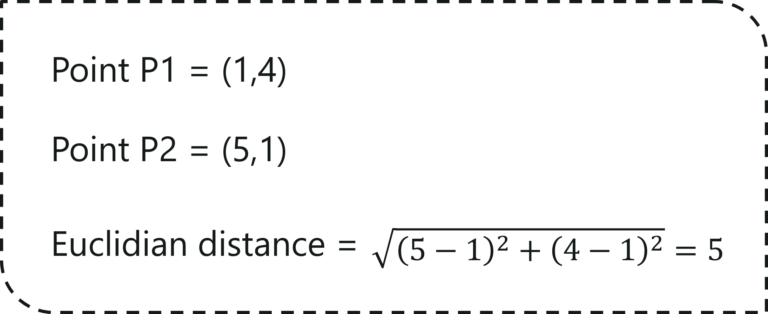
https://www.edureka.co/blog/knn-algorithm-in-r/


Our normalised training dataset
Our normalised test dataset

## Como escolher o valor de K?
Este parâmetro direcionará a quantidade de vizinhos (neighborn em inglês). Em casos de modelos binários, onde possuímos apenas duas classes, em geral aplicasse valores ímpares a K, mas lembre que cada caso é um caso, “No free lunch”. Imagine que temos um valor P1 o qual queremos predizer, entre um grupo de duas classes aonde o valor atribuído a K foi 1 (K=1), primeiro iremos identificar o ponto mais próximo a ele e depois qual a label que o identifica (classe A por exemplo) <br>
O número de vizinhos (neighborn = K) no algoritmo KNN é um hiperparametro o qual devemos escolher ao construir um modelo com base no KNN, então considere o K como a variável de controle para a predição/classificação. Como de costume, o “NO FREE LUNCH” neste caso também é q máxima, nçao existe um número mágico, pois cada dataset é de um jeito, costumo dizer que dados são vivos e mutáveis e cada caso ele terá um comportamento, ou seja, um padrão. Valores atribuídos a K que sejam muito baixos serão influenciados por ruídos nos dados gerando assim influência no resultado final obtido, em contrapartida valores muito altos serão computacionalmente custosos.

Slightly higher k values can also act to reduce noise in datasets. However it is best to experiment with different k values and use cross validation techniques to find the best value for your specific case.

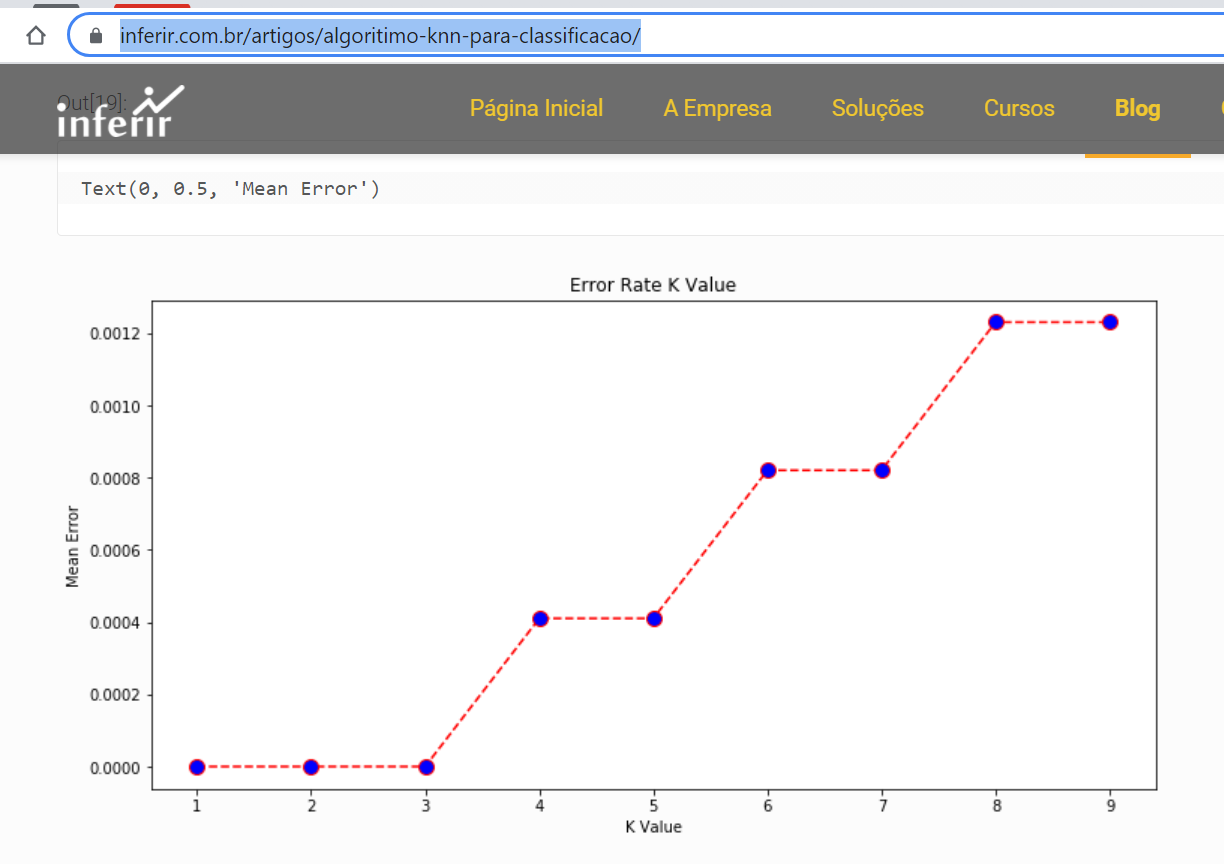
https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

## Medidasde distância
* Distância Euclidiana <br>
* Distância de Hamming <br>
* Distância Manhattan <br>
* Distância de Markowski <br>

## Decision Boundaries
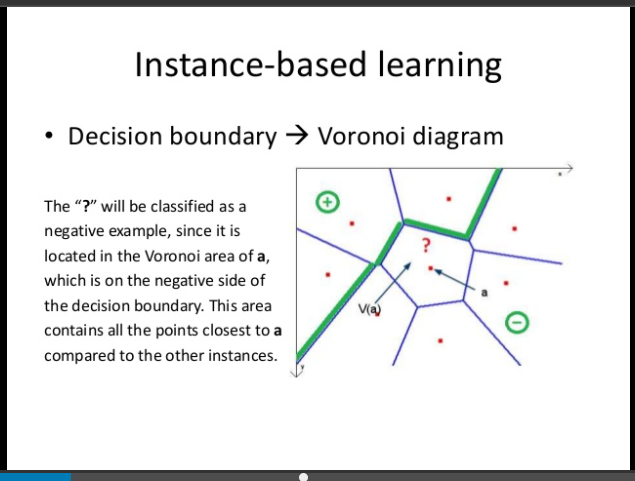

Alguns estudos com valores K baixos, mostraram que o processo de fit fica mais flexível os quais terão resultados menos enviesados (bias) mas com uma alta variância, já os resultados com valores altos atribuídos a K gerando vários vizinhos, resultarão em uma fronteira de decisão (decision boundary) mais sensível, resultando uma baixa variância dos resultados mas um risco altíssimo de enviesamento.

## Bibliografia
* https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/ <br>

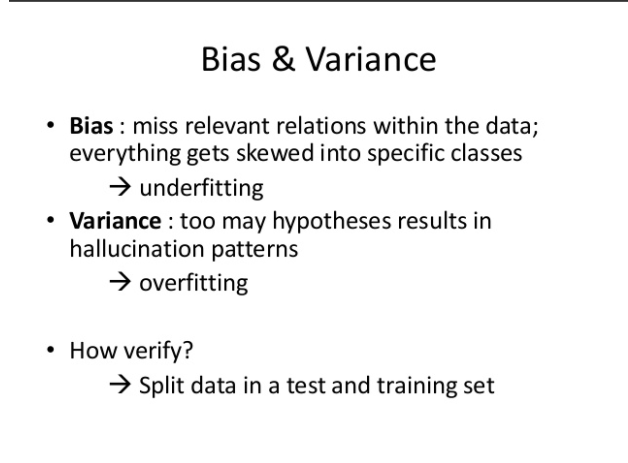

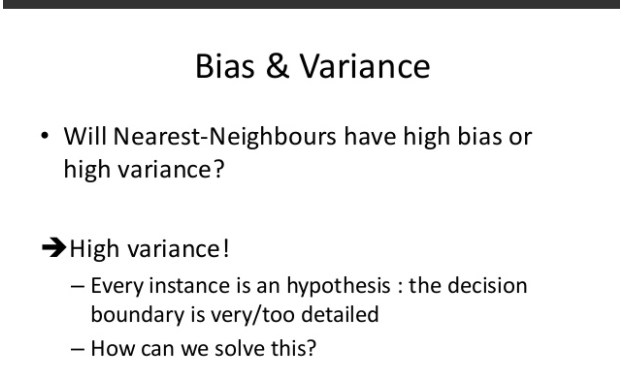

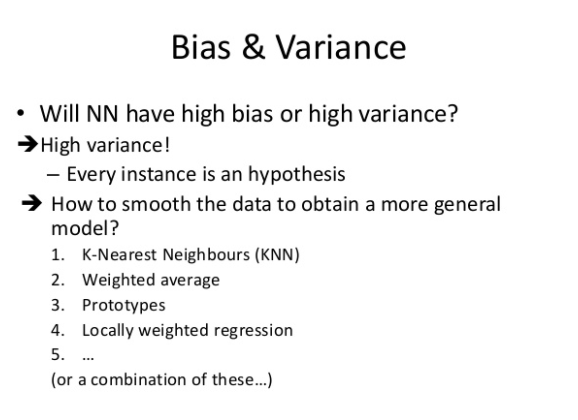

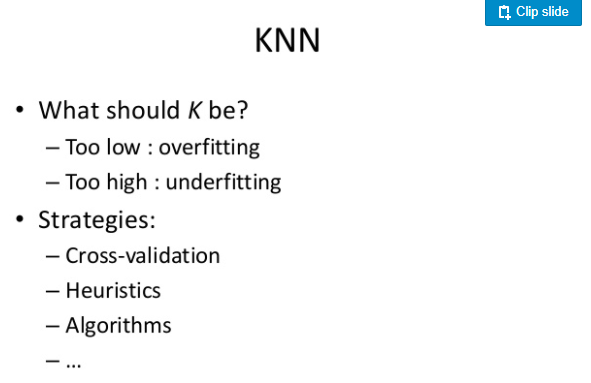

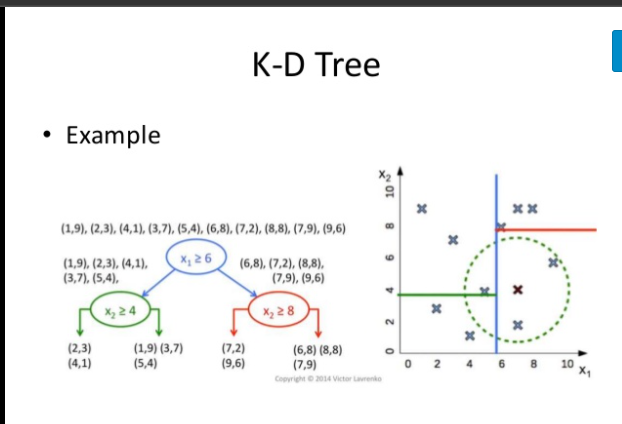
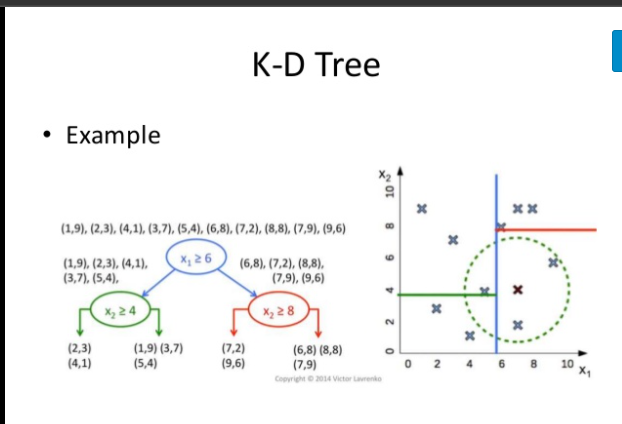
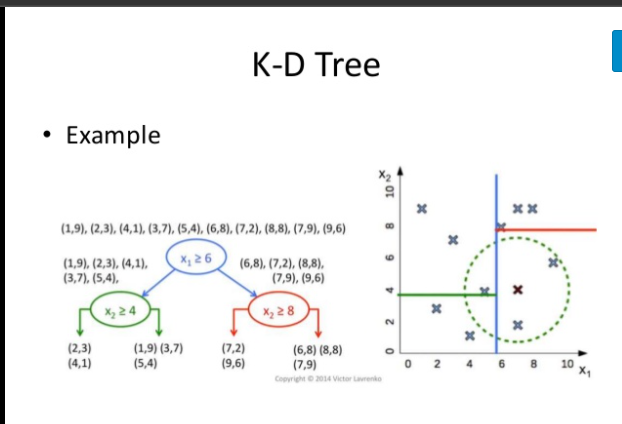
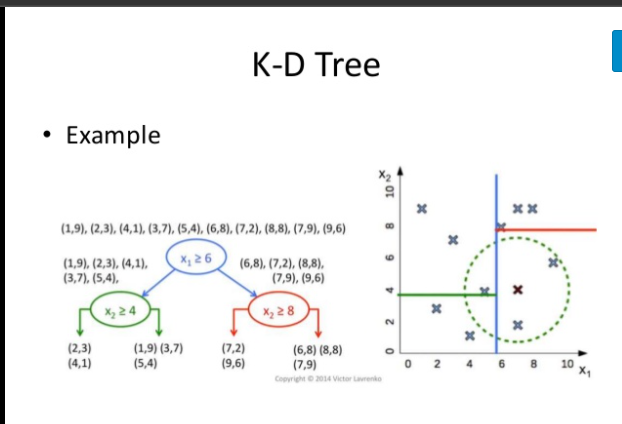
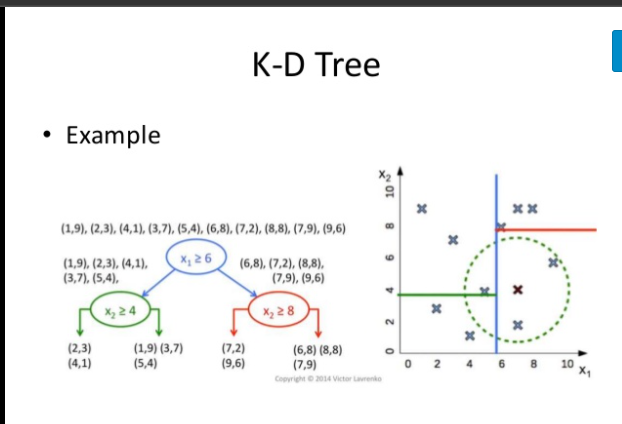
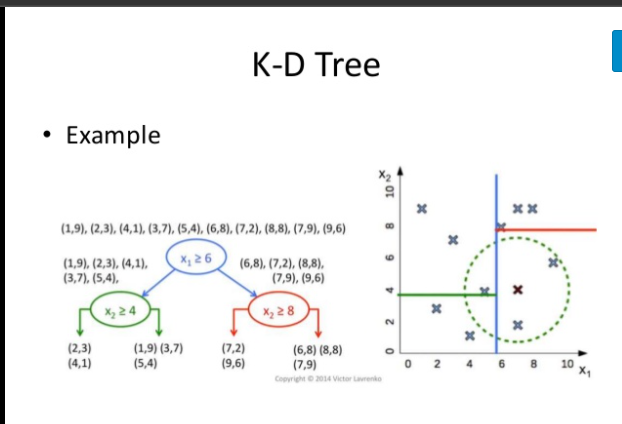
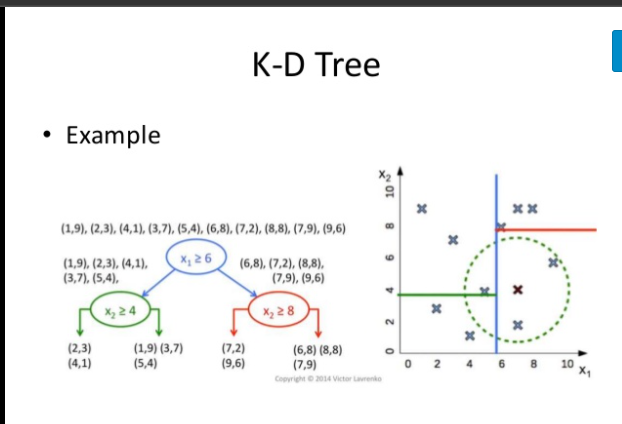
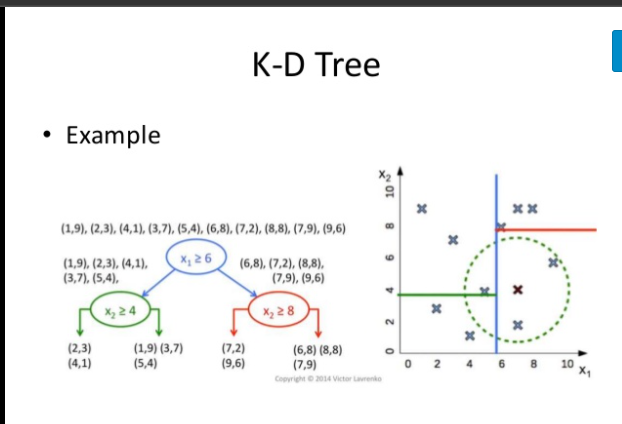
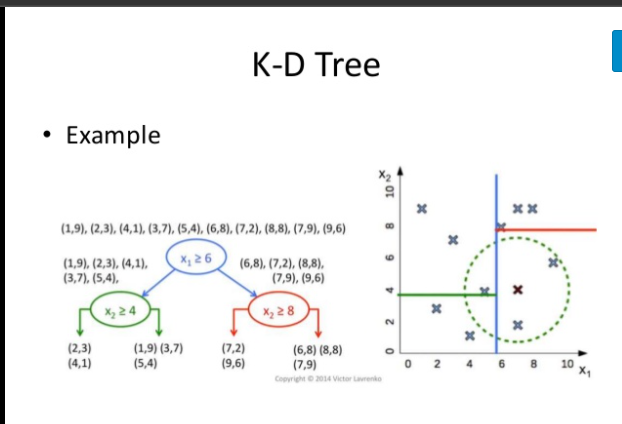
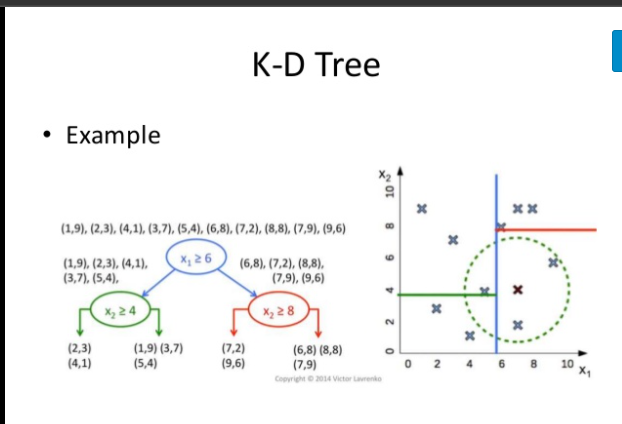
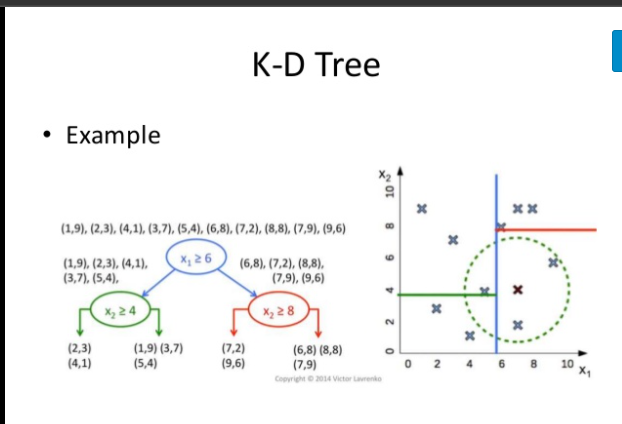
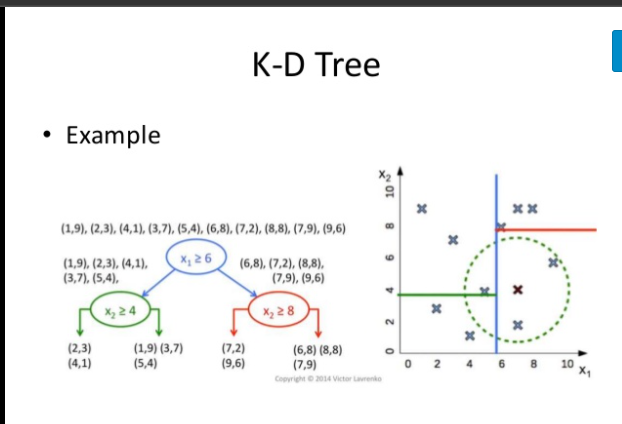
https://www.slideshare.net/jorisschelfaut/knn-154482179

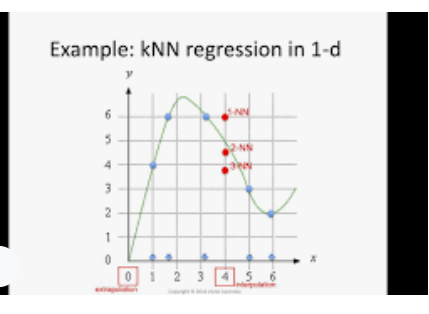

In [ ]:
plt.figure()
plt.title(f"KNN fronteira de decisão com {k} vizinhos", fontsize=16)
plot_decision_boundaries(X_train, y_train,
                            KNeighborsClassifier,
                            n_neighbors=k)
plt.show();

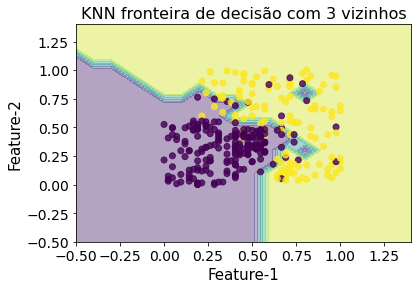

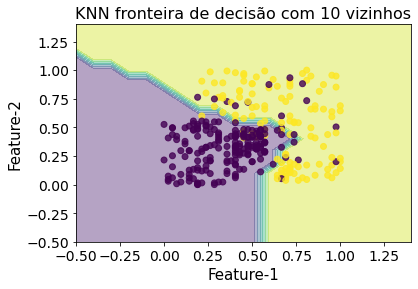

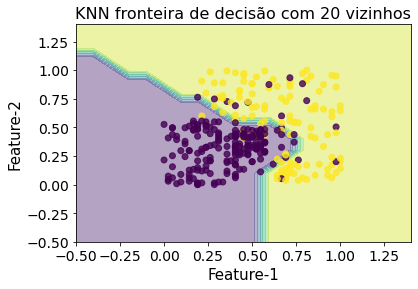

In [94]:
# from utils import plot_decision_boundaries

# %load_ext autoreload
# %autoreload 2
# import utils as ut

for k in [3,10,20]:
    plt.figure()
    plt.title(f"KNN fronteira de decisão com {k} vizinhos", fontsize=16)
    plot_decision_boundaries(X_train, y_train,
                                KNeighborsClassifier,
                                n_neighbors=k)
    plt.show();

In [93]:
def plot_decision_boundaries(X, y, model_class, features=[], **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
            
    https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
    https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    if len(features)==2:
        reduced_data = X[features]
    else:
        # Reduces to the first two columns of data
        reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    borders = 0.5
    x_min, x_max = X[:, 0].min() - borders, X[:, 0].max() + borders
    y_min, y_max = X[:, 1].min() - borders, X[:, 1].max() + borders
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
from sklearn import neighbors

# iris = datasets.load_iris()
# x = iris.data[:,0:2] 
# y = iris.target

# # create the x0, x1 feature
# x0 = x[:,0]
# x1 = x[:,1]
x0 = dataset['Age']
x1 = dataset['EstimatedSalary']

# set main parameters for KNN plot
N_NEIGHBORS = 3 # KNN number of neighbors
H = 0.1 # mesh stepsize
PROB_DOT_SCALE = 40 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
TRUE_DOT_SIZE = y_train.sum() # size of the true labels
PAD = 1.0 # how much to "pad" around the true labels

# clf = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
# clf.fit(x, y)

# find the min/max points for both x0 and x1 features
# these min/max values will be used to set the bounds
# for the plot
x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

# create 1D arrays representing the range of probability data points
# on both the x0 and x1 axes.
x0_axis_range = np.arange(x0_min,x0_max, H)
x1_axis_range = np.arange(x1_min,x1_max, H)

# create meshgrid between the two axis ranges
xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)

# put the xx in the same dimensional format as the original x
# because it's easier to work with that way (at least for me)
# * shape will be: [no_dots, no_dimensions]
#   where no_dimensions = 2 (x0 and x1 axis)
xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))

yy_hat = clf.predict(xx) # prediction of all the little dots
yy_prob = clf.predict_proba(xx) # probability of each dot being 
                                # the predicted color
yy_size = np.max(yy_prob, axis=1)

# make figure
plt.style.use('seaborn-whitegrid') # set style because it looks nice
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)

# establish colors and colormap
#  * color blind colors, from 
#  https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec
redish = '#d73027'
orangeish = '#fc8d59'
yellowish = '#fee090'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

# plot all the little dots, position defined by the xx values, color
# defined by the knn predictions (yy_hat), and size defined by the 
# probability of that color (yy_prob)
# * because the yy_hat values are either 0, 1, 2, we can use 
#   these as values to index into the colormap array
# * size of dots (the probability) increases exponentially (^3), so that there is
#   a nice difference between different probabilities. I'm sure there is a more
#   elegant way to do this though...
# * linewidths=0 so that there are no "edges" around the dots
ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, 
           s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)

# plot the contours
# * we have to reshape the yy_hat to get it into a 
#   2D dimensional format, representing both the x0
#   and x1 axis
# * the number of levels and color scheme was manually tuned
#   to make sense for this data. Would probably change, for 
#   instance, if there were 4, or 5 (etc.) classes
ax.contour(x0_axis_range, x1_axis_range, 
           np.reshape(yy_hat,(xx0.shape[0],-1)), 
           levels=3, linewidths=1, 
           colors=[redish,blueish, blueish,orangeish,])

# plot the original x values.
# * zorder is 3 so that the dots appear above all the other dots 
ax.scatter(x[:,0], x[:,1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3, 
           linewidths=0.7, edgecolor='k')

# create legends
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# set x-y labels
ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")

# create class legend
# Line2D properties: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# about size of scatter plot points: https://stackoverflow.com/a/47403507/9214620
legend_class = []
for flower_class, color in zip(['c', 's', 'v'], [blueish, redish, orangeish]):
    legend_class.append(Line2D([0], [0], marker='o', label=flower_class,ls='None',
                               markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE), 
                               markeredgecolor='k', markeredgewidth=0.7))

# iterate over each of the probabilities to create prob legend
prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey', 
                              markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                              markeredgecolor='k', markeredgewidth=0))



legend1 = ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.05, 0.35),
                    frameon=False, title='class')

legend2 = ax.legend(handles=legend_prob, loc='center', 
                    bbox_to_anchor=(1.05, 0.65),
                    frameon=False, title='prob', )

ax.add_artist(legend1) # add legend back after it disappears

ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

# only use integers for axis tick labels
# from: https://stackoverflow.com/a/34880501/9214620
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# set the aspect ratio to 1, for looks
ax.set_aspect(1)

# remove first ticks from axis labels, for looks
# from: https://stackoverflow.com/a/19503828/9214620
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])

plt.show()

ValueError: query data dimension must match training data dimension

estão livres para aprender qualquer forma funcional a partir dos dados de treinamento.

Os métodos não-paramétricos são bons quando você tem muitos dados e pouco conhecimento prévio, e quando não quer se preocupar muito em escolher apenas as variáveis certas para o problema. Por exemplo, se você tem uma base de dados em que, por privacidade, os nomes dos atributos não estão estão identificados e você não sabe os que estas variáveis significam. <br>
Um exemplo de modelo não paramétrico é o algoritmo knn em que uma observação nova adere a classe dos k de vizinhos mais próximos. O método não assume nada sobre a forma da função de mapeamento, a não ser que próximas provavelmentetem  uma variável de saída similar.

Alguns exemplos de algoritmos de aprendizado de máquina não paramétricos são:

knn

· Árvores de decisão como CART e C4.5

· SVM (Support Vector Machines)

Os  Algoritmos de Aprendizado de Máquina Não Paramétricos tem maior flexibilidade podendo se  encaixar em vários de tipos de funções .Seu desempenho é em geral superior, porém 

· requerem mais dados de treinamento para estimar a função de mapeamento e são 

· mais lentos para treinar, pois muitas vezes precisam de muitos ajustes. Também estão mais propensos a Overfitting.

Manhattan distance measures the distance either vertically or horizontally it is used when we have grid type of data like for instance modern cities roads are vertical or horizontal in this scenario we have to follow the roads we can’t jump over the buildings.
Manhattan distance is preferable over Euclidean distance in the case of when we have high dimensional data.
In Minkowski distance, if put p=1 it would be Manhattan distance if put p=2 it would be Euclidean distance .]
iv). Hamming Distance
It has limited applications, it is used in especially in strings if we are measuring two string in which locations strings are different.

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

k_range = list(range(1,100))
weight_options = ["uniform", "distance"]
distance_options = [1, 2]

param_grid = dict(n_neighbors = k_range, weights = weight_options, p=distance_options)

knn = KNeighborsClassifier()

grid = RandomizedSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy', n_iter=20)
grid.fit(X_train, y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)


0.8907893963439723
{'weights': 'distance', 'p': 2, 'n_neighbors': 17}
KNeighborsClassifier(n_neighbors=17, weights='distance')


In [122]:
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = accuracy_score(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values

<AxesSubplot:>

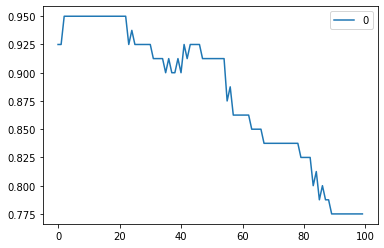

In [121]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
A) Manhattan
B) Minkowski
C) Tanimoto
D) Jaccard
E) Mahalanobis

## Principais pontos do KNN:
* É um algoritmo supervisionado, ou seja, precisa de uma variável de target <br>
* Aplicável tanto para problemas de classificação (target são classes) quanto de regressão (target contínuo) <br>
* É um dos modelos mais simples e fáceis de ser implementado e compreendido <br>
* É um modelo não paramétrico (não pressupõem que a relação entre as entradas e saídas de seus dados sigam uma função matemática específica) <br>
* É um algoritmo preguiçoso (lazy). stes tipos de algoritmos trabalham menos na fase de treinamento e muito mais na fase de teste, pois simplesmente armazenam as instâncias de dados do treinamento para na fase de teste realizar o trabalho pesado. <br>
* É um Algoritmo de Aprendizagem Não Linear, ou seja, não utiliza linhas e hiperplanos para separar os dados
* Pode ser aplicado em casos que temos pouca quantidade de dados

#### Prós 

1 – É um dos mais simples algoritmos a se implementar.  <br>
2 – Modelos mais complexos, como uma rede neural, necessitam de uma quantidade maior de dados para serem treinados que o KNN. <br>
3 – Poucos paramêtros para tunning (Valor de K, Medida de Distância e peso nas distâncias) <br>
4 – O tempo de treinamento é utilizado para "memorizar" os dados. Ele armazena os dados na RAM. Por isso ele possui um dos fit mais rápidos. <br>
5 – O KNN pode ser utilizado em dados não lineares bem como para problemas de regressão. <br>
6 – Facilmente interpretável <br>


#### Contras

1 – Demora excessiva na fase de teste e alto consumo de memória para realizar esta atividade, uma vez que o mesmo armazena todo dataset em memória. (KDtrees e BallTrees)<br>
2 – KNN não é indicado a dados de grandes dimensões, imagina ter que calcular a distância de todos os pontos de dados entre si. Quanto mais dados e mais dimensões desses registros, maior será o tempo para processar os cálculos. <br>
3 – Como ele depende de medidas de distância é importante se atentar a escala dos valores utilizados. <br>
4 – Classes muito desbalanceadas faz com que a classe marjoritária domine na votação
5 – Dimensões irrelevantes podem causar ruídos nos dados


4.Failure Cases of KNN?
1. When given data points very far away from the data points it can not find any surrounding data points so we can not say the given data point belongs to positive or negative.
2. When our data set spread randomly or in other words mixed up all the classes we can not find which class it belongs to so, it fails. <br>
<br>
KNN is a non-parametric algorithm and does not require any assumptions on the data distribution. This gives KNN an extra edge in specific settings where the data is highly unusual. This is the reason for KNN being the first choice when there is no prior knowledge or very little knowledge about the data distribution. <br> <br>
5)    The accuracy of KNN deteriorates with high-dimension data as there is hardly any difference between the nearest and farthest neighbor. High dimensionality of datasets is a major problem when working with classification algorithms like KNN. KNN suffers from the curse of dimensionality because it is usually implemented using an approximate nearest neighbor search algorithm such as KD-tree